In [170]:
import cv2

# Load the image
image = cv2.imread('three_column.jpg')

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Save the grayscale image
#cv2.imwrite('grayscale_image.jpg', gray_image)


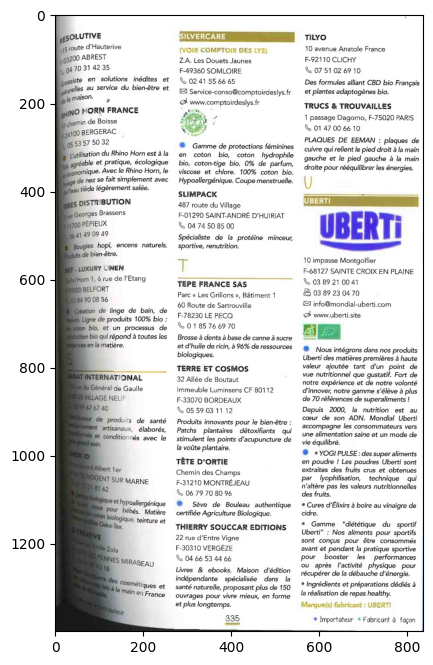

In [93]:
plt.figure(figsize=(20,8))
plt.imshow(image)

In [94]:
import numpy as np

In [95]:
import matplotlib.pyplot as plt

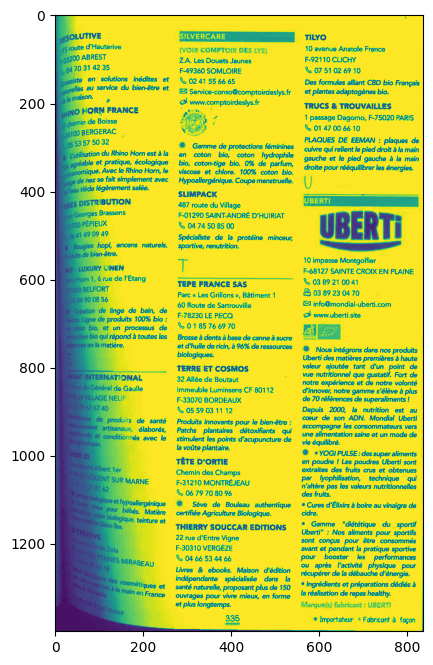

In [96]:
b, g, r = cv2.split(image)
plt.figure(figsize=(20,8))
plt.imshow(g)

In [97]:
# Invert the grayscale image
inverted_gray_image = cv2.bitwise_not(g)

In [98]:
inverted_gray_image[:, 0: inverted_gray_image.shape[1]//10] = 255
inverted_gray_image[:, inverted_gray_image.shape[1]-(inverted_gray_image.shape[1]//10): inverted_gray_image.shape[1]] = 255

In [99]:
# inverted_gray_image[inverted_gray_image>0] = 150

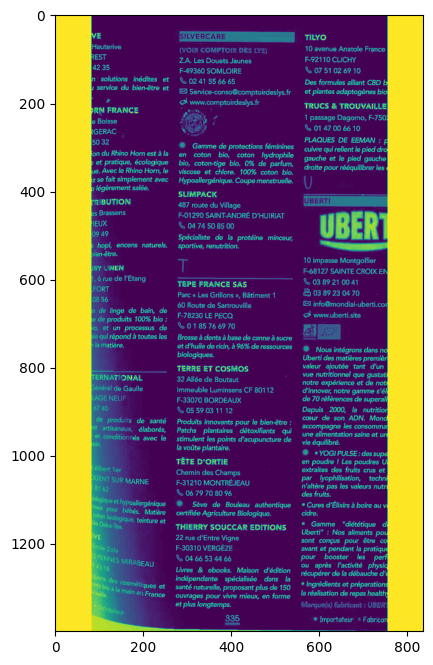

In [100]:
plt.figure(figsize=(20,8))
plt.imshow(inverted_gray_image)

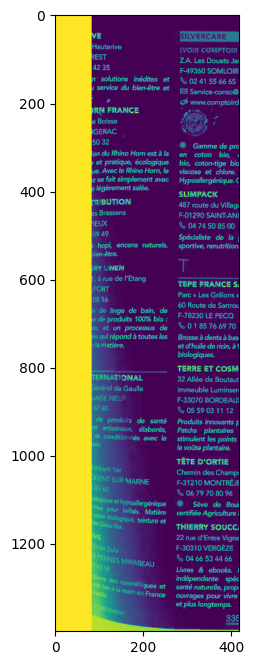

In [101]:
plt.figure(figsize=(20,8))
plt.imshow(inverted_gray_image[:, 0: inverted_gray_image.shape[1]//2])

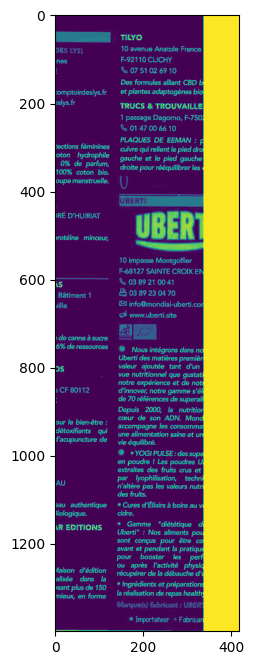

In [102]:
plt.figure(figsize=(20,8))
plt.imshow(inverted_gray_image[:, inverted_gray_image.shape[1]//2: inverted_gray_image.shape[1]])

In [110]:
line_median = inverted_gray_image.shape[1]//2
first_gap = np.argmin(inverted_gray_image[:, 0:line_median].sum(axis=0))
second_gap = np.argmin(inverted_gray_image[:, line_median: inverted_gray_image.shape[1]].sum(axis=0))

In [111]:
first_gap

271

In [112]:
secong_gap

127

In [109]:
line_median

418

In [113]:
second_gap = second_gap + line_median
image1 = image[:, 0: first_gap]
image2 = image[:, first_gap: second_gap]
image3 = image[:, second_gap: image.shape[1]]

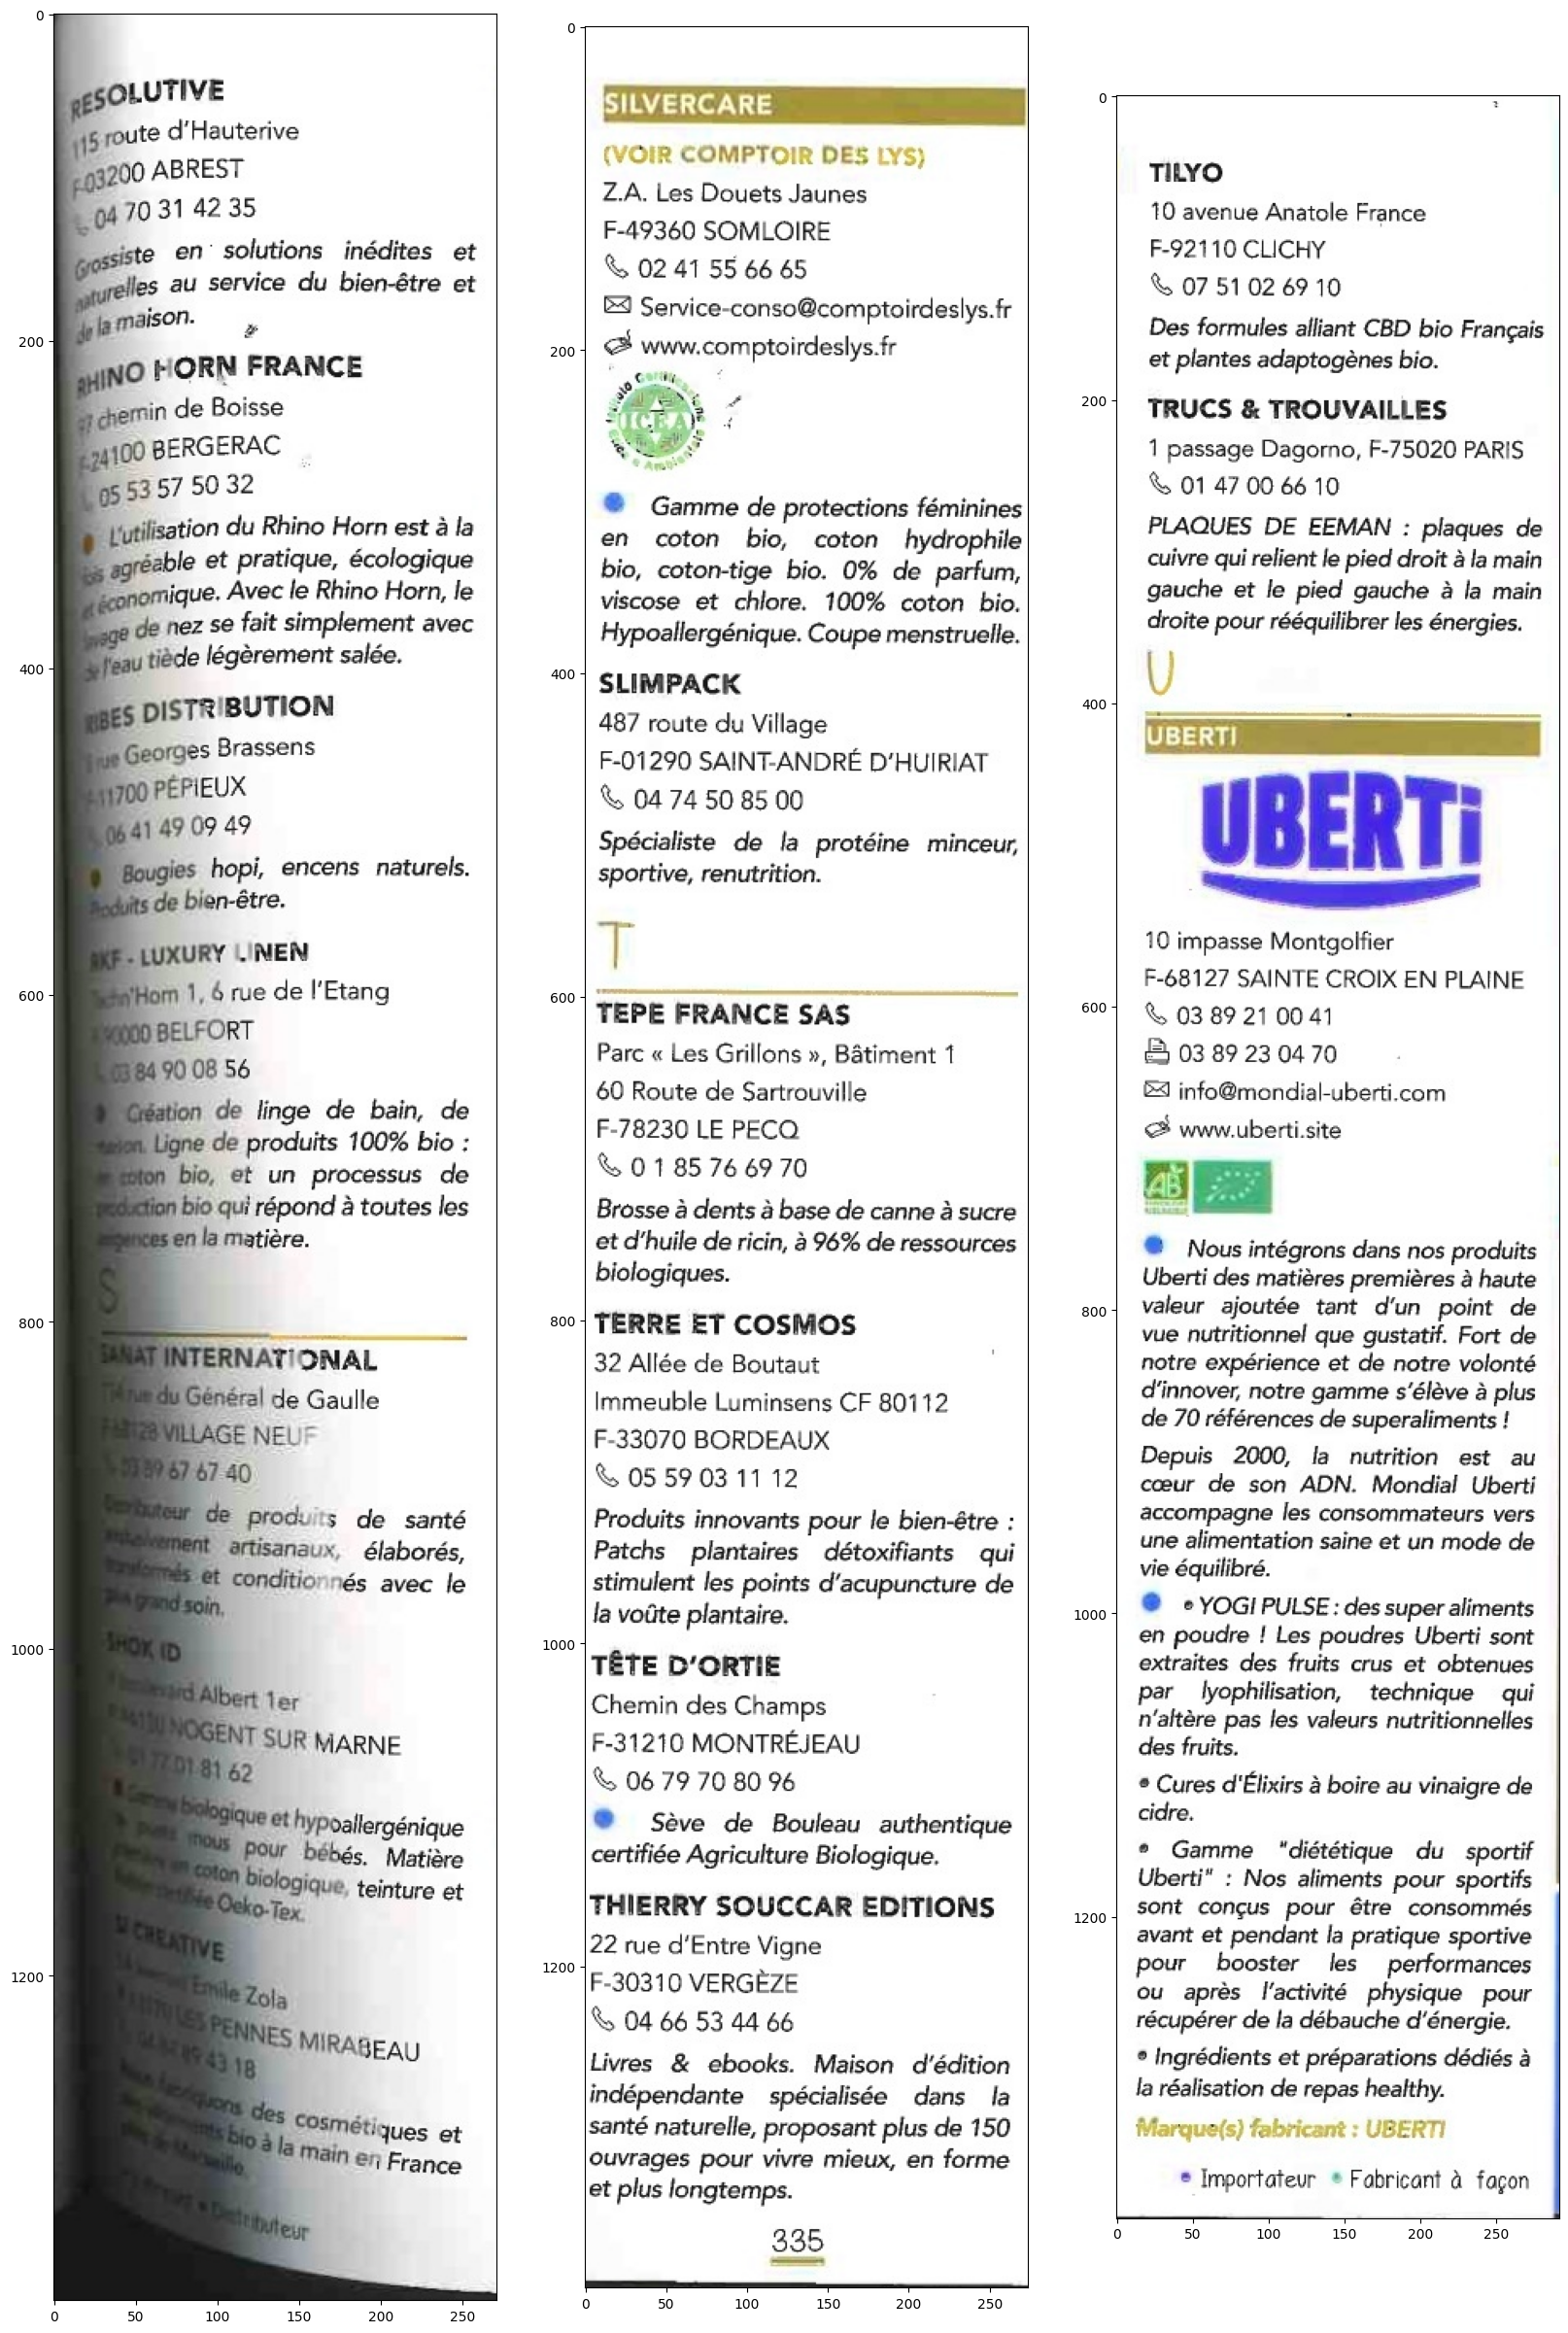

In [114]:
plt.figure(figsize=(20,60))
plt.subplot(1, 3, 1)
plt.imshow(image1)
plt.subplot(1, 3, 2)
plt.imshow(image2)
plt.subplot(1, 3, 3)
plt.imshow(image3)
plt.show()

In [71]:
import cv2
from typing import List
import numpy as np

class ImageSplitter:
    
    def __init__(self, image):
        self.image = image
        self.inverted_gray_image = None
        
    def gray_scale_image(self):
        """Convert the image to grayscale"""
        gray_image = cv2.cvtColor(self.image, cv2.COLOR_BGR2GRAY)
        # Invert the grayscale image
        self.inverted_gray_image = cv2.bitwise_not(gray_image)
        
    def split_image(self):
        
        self.gray_scale_image()
        
        marigin = self.inverted_gray_image.shape[1]//10
        y_max = self.inverted_gray_image.shape[1]
        
        self.inverted_gray_image[:, 0:marigin] = 255
        self.inverted_gray_image[:, y_max-marigin: y_max] = 255
        
        line_median = self.inverted_gray_image.shape[1]//2
        first_gap = np.argmin(self.inverted_gray_image[:, 0:line_median].sum(axis=0))
        second_gap = np.argmin(self.inverted_gray_image[:, line_median: y_max].sum(axis=0))

        second_gap = second_gap + line_median
        image1 = self.image[:, 0: first_gap]
        image2 = self.image[:, first_gap: second_gap]
        image3 = self.image[:, second_gap: self.image.shape[1]]
        # save image
        #cv2.imwrite('image'+ str(i)+ '.jpg', gray_image)
        cv2.imwrite('image1', image1)
        cv2.imwrite('image2', image2)
        cv2.imwrite('image1', image3)
        
        return (image1, image2, image3)

(1399, 837)

# 2eme technique
utilisant **DBSCAN**

In [133]:
sorted_array = np.sort(inverted_gray_image.sum(axis=0))

In [136]:
np.min(inverted_gray_image.sum(axis=0))/inverted_gray_image.shape[0]

0.23516797712651893

In [142]:
index_sorted_array[sorted_array/inverted_gray_image.shape[0] < 1]

array([545, 551, 546, 550, 548, 547, 549, 554, 552, 544, 553, 555, 556,
       557, 271, 270, 269, 268], dtype=int64)

In [157]:
import numpy as np
from sklearn.cluster import DBSCAN

sorted_array = np.sort(inverted_gray_image.sum(axis=0))
index_sorted_array = np.argsort(inverted_gray_image.sum(axis=0))

# Index Array
data = index_sorted_array[sorted_array/inverted_gray_image.shape[0] < 1]

# Réorganiser les données en colonne
X = data.reshape(-1, 1)

# Utiliser DBSCAN pour trouver les clusters
dbscan = DBSCAN(eps=10, min_samples=2)  
dbscan.fit(X)

# Obtenir les labels des clusters
labels = dbscan.labels_

# Extraire les valeurs uniques de chaque cluster
unique_labels = np.unique(labels)

groups = {}
# Afficher les blocs trouvés
for label in unique_labels:
    if label == -1:
        print("Noise:", data[labels == label])
    else:
        print("Groupe {} : {}".format(label, data[labels == label]))
        groups["Group{}".format(label)] = data[labels == label]

gaps = []
for value in groups.values():
    gaps.append(int(np.median(value)))


Groupe 0 : [545 551 546 550 548 547 549 554 552 544 553 555 556 557]
Groupe 1 : [271 270 269 268]
[269, 550]


In [180]:
gaps = sorted(gaps)
images = []
previous_left = 0

for i, gap in enumerate(sorted(gaps)):
    images.append(image[:, previous_left: gap])
    previous_left = gap
images.append(image[:, previous_left: inverted_gray_image.shape[1]])

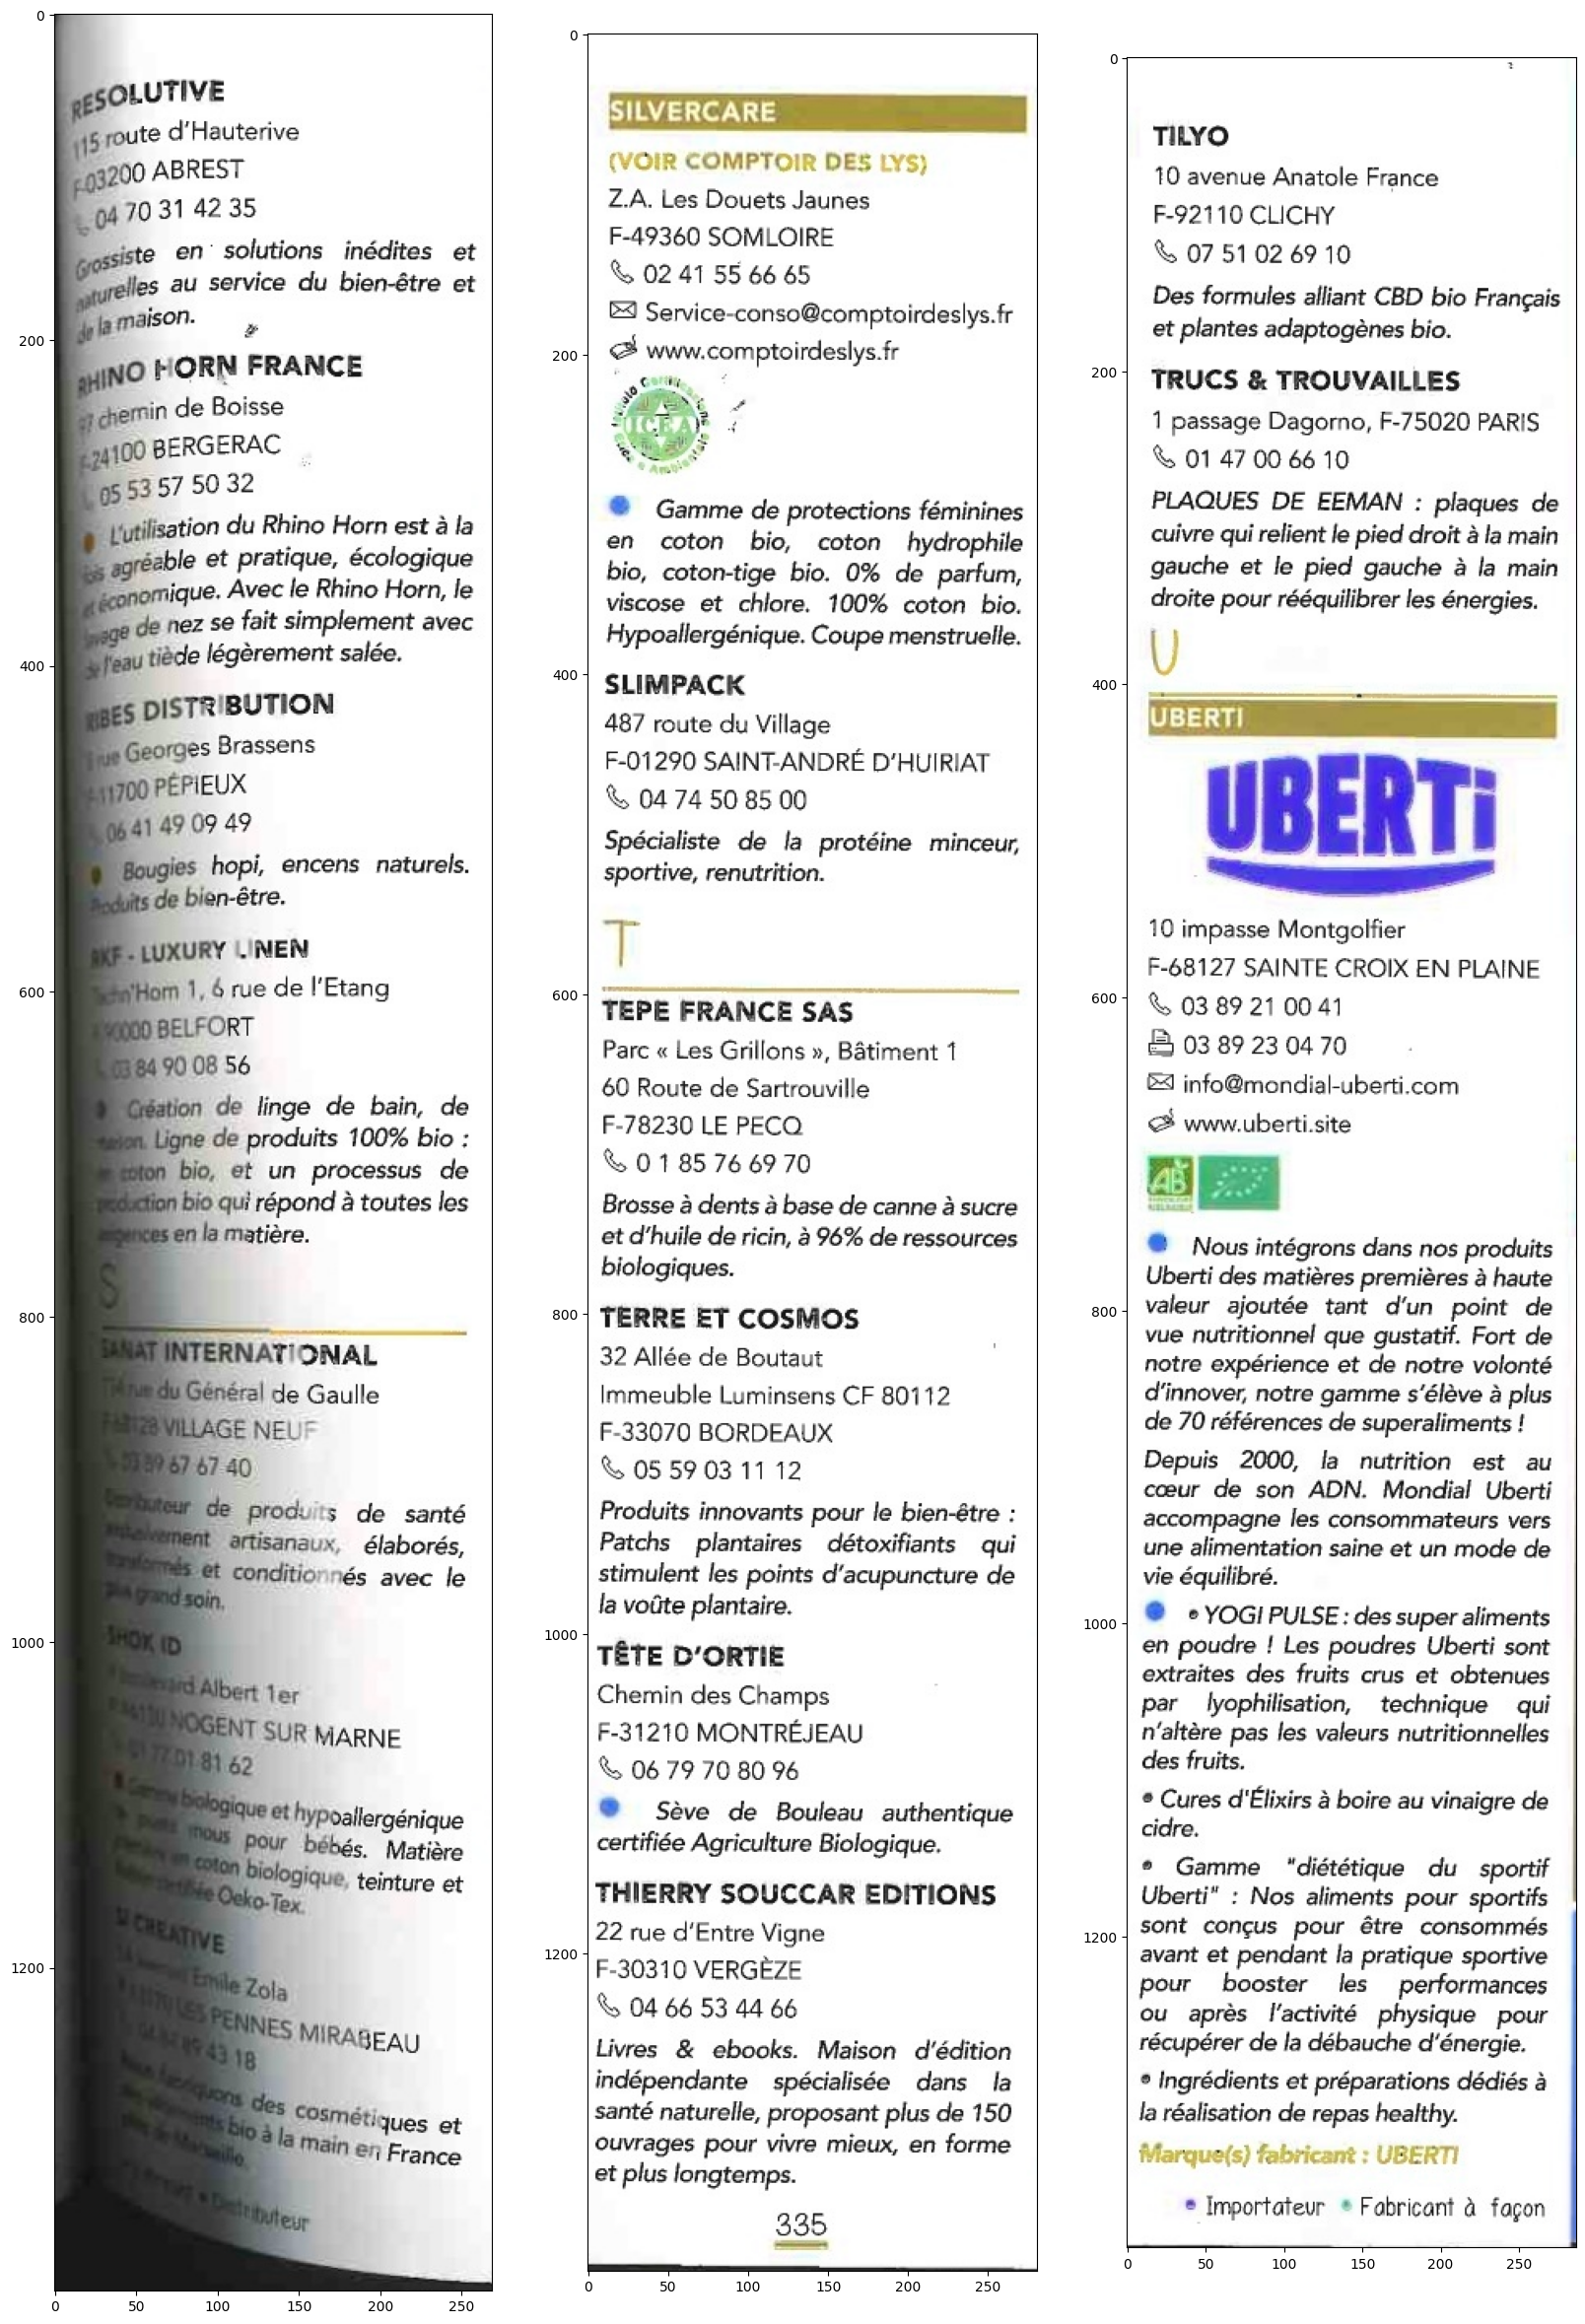

In [181]:
plt.figure(figsize=(20,30))
for i, content in enumerate(images):
    plt.subplot(1,len(images), i+1)
    plt.imshow(content)
plt.show()

In [183]:
tuple(images)

(array([[[ 38,  38,  38],
         [ 63,  63,  63],
         [ 91,  91,  91],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[ 50,  50,  50],
         [ 72,  72,  72],
         [ 95,  95,  95],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[ 57,  57,  57],
         [ 77,  77,  77],
         [ 97,  97,  97],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[ 24,  24,  24],
         [ 24,  24,  24],
         [ 24,  24,  24],
         ...,
         [ 49,  49,  49],
         [ 46,  46,  46],
         [ 44,  44,  44]],
 
        [[ 24,  24,  24],
         [ 24,  24,  24],
         [ 24,  24,  24],
         ...,
         [ 44,  44,  44],
         [ 47,  47,  47],
         [ 47,  47,  47]],
 
        [[ 24,  24,  24],
         [ 24,  24,  24],
         [ 24,  24,  24],
         ...,
         [ 42,  42,  42],
  

In [117]:
x = range(inverted_gray_image.shape[1]) 
y = inverted_gray_image.sum(axis=0)

In [131]:
inverted_gray_image.shape

(1399, 837)

In [24]:
for index in range(0, inverted_gray_image.shape[1], index_gap):
    print(index)

0
284
568
